In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Deep Neural Networks

## Convolutional Neural Network
### Fashion MNIST Dataset

In [2]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from collections.abc import Callable
from typing import Literal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 

%matplotlib inline

2023-12-05 11:30:09.904915: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# gpus = tf.config.list_physical_devices('GPU')

# try:
#     for g in gpus:
#         tf.config.experimental.set_memory_growth(g, True)
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print (len(gpus), 'Phusical GPUs', len(logical_gpus), 'Logical GPUs')
# except:
#     print ('invalid device')

In [4]:
###----------------
### Some parameters
###----------------

inpDir = '/home/dai/Documents/DNN/7.DNN/input'
outDir = '../output'
modelDir = '../models'
subDir = 'flower_photos'
altName = 'cnn_base'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results


EPOCHS = 50 # number of epochs
ALPHA = 0.001 # learning rate
TEST_SIZE = 0.2
BATCH_SIZE = 32
LR_PATIENCE = 2
FACTOR_LR = 0.5
PATIENCE = 4
IMG_HEIGHT = 190
IMG_WIDTH = 190

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

In [5]:


def fn_plot_label(tr_ds , ts_ds):
    
    plt.figure(figsize=(15,5)) # instantiate the figure
    
    plt.subplot(1, 2, 1) # first out of 2
    
    train_labels = tf.concat([lbl for img, lbl in tr_ds], axis= 0).numpy() # get the lables
    
    unique, _, counts = tf.unique_with_counts(train_labels) # get counts
    
    plt.bar(range(len(unique)), counts, align='center', color= 'DarkBlue') # barplot the count
    
    plt.xticks(range(len(unique)), class_names)
    
    plt.title('Traning Set')
    
    plt.subplot(1, 2, 2)
    
    test_labels = tf.concat([lbl for img, lbl in ts_ds], axis= 0).numpy()
     
    unique, _, counts = tf.unique_with_counts(test_labels)
    
    plt.bar(range(len(unique)), counts, align='center', color= 'Orange')
    
    plt.xticks(range(len(unique)), class_names)
    
    plt.title('Test Set')

### Using Flowers Data

Coverting to Datasets from a directory

In [6]:
data_dir = os.path.join(inpDir, subDir)
data_dir

'/home/dai/Documents/DNN/7.DNN/input/flower_photos'

In [7]:
os.listdir(data_dir)

['LICENSE.txt', 'daisy', 'roses', 'tulips', 'dandelion', 'sunflowers']

In [8]:
#create traning data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, #path to the data directory
    validation_split = TEST_SIZE, #what ratio of validation data
    subset = 'training', #purpose
    seed = RANDOM_STATE,
    image_size = [IMG_HEIGHT, IMG_WIDTH], 
    batch_size = BATCH_SIZE
)

#create test data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, #path to the data directory
    validation_split = TEST_SIZE, #what ratio of validation data
    subset = 'validation', #purpose
    seed = RANDOM_STATE,
    image_size = [IMG_HEIGHT, IMG_WIDTH], 
    batch_size = BATCH_SIZE
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


2023-12-05 11:30:12.568198: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
# is it picking class names
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

2023-12-05 11:30:13.131321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2936]
	 [[{{node Placeholder/_0}}]]
2023-12-05 11:30:13.132748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2936]
	 [[{{node Placeholder/_4}}]]


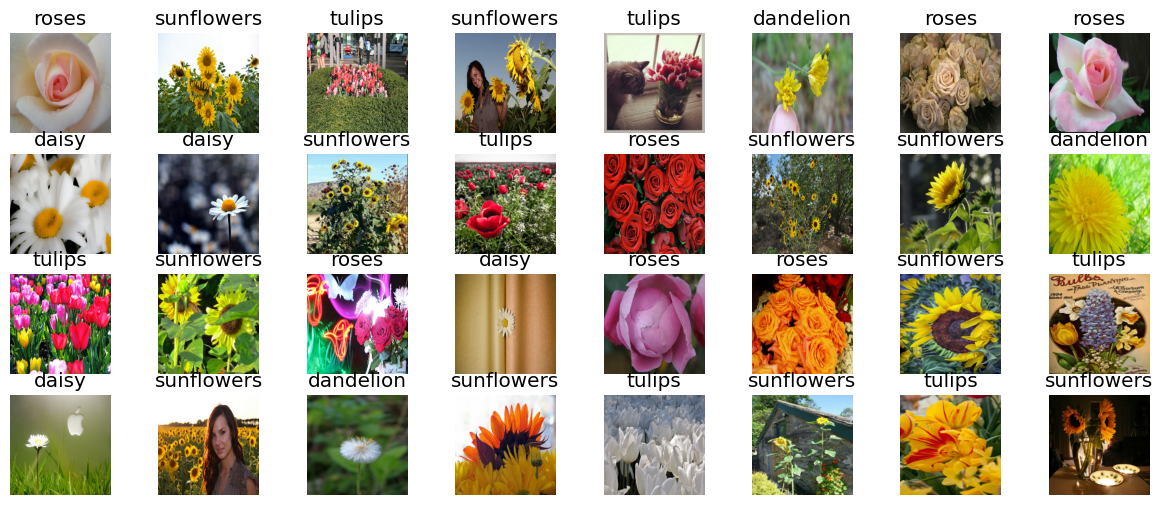

In [10]:
plt.figure(figsize=(15,6))

for images, labels in train_ds.take(1): # get me one batch
    
    for i in range (BATCH_SIZE): #loop over batch
        
        plt.subplot(int(BATCH_SIZE/8),8, i+1) # access the axis
        
        plt.grid(False)
        
        plt.imshow(images[i].numpy().astype('uint8')) # show image convert to numpy and int
        
        plt.title(class_names[labels[i]])
        
        plt.axis('off')
        
    plt.show()

2023-12-05 11:30:15.323184: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [734]
	 [[{{node Placeholder/_4}}]]
2023-12-05 11:30:15.324415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [734]
	 [[{{node Placeholder/_0}}]]


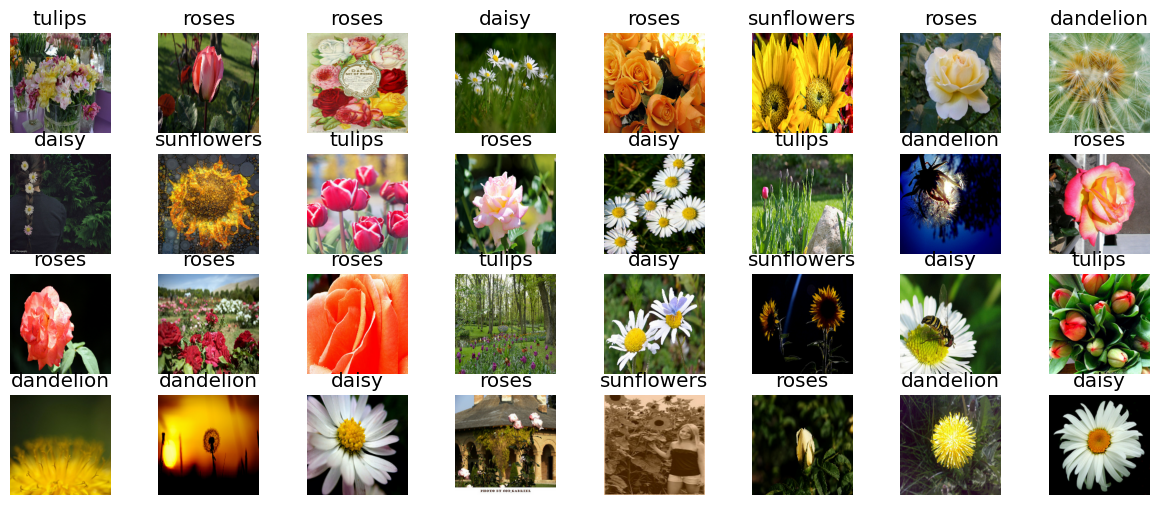

In [11]:
plt.figure(figsize=(15,6))

for images, labels in test_ds.take(1): # get me one batch
    
    for i in range (BATCH_SIZE): #loop over batch
        
        plt.subplot(int(BATCH_SIZE/8),8, i+1) # access the axis
        
        plt.grid(False)
        
        plt.imshow(images[i].numpy().astype('uint8')) # show image convert to numpy and int
        
        plt.title(class_names[labels[i]])
        
        plt.axis('off')
        
    plt.show()

2023-12-05 11:30:17.528768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2936]
	 [[{{node Placeholder/_4}}]]
2023-12-05 11:30:17.529608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2936]
	 [[{{node Placeholder/_4}}]]
2023-12-05 11:30:20.271783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [734]
	

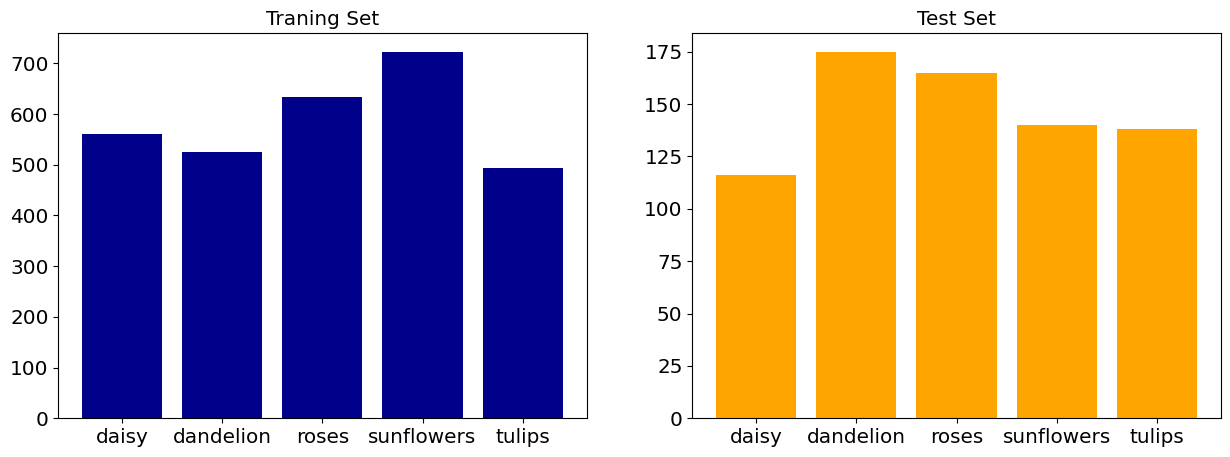

In [12]:
fn_plot_label(train_ds, test_ds)

In [13]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

## Random Zoom

2023-12-05 11:30:23.072505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [734]
	 [[{{node Placeholder/_4}}]]
2023-12-05 11:30:23.073631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [734]
	 [[{{node Placeholder/_4}}]]


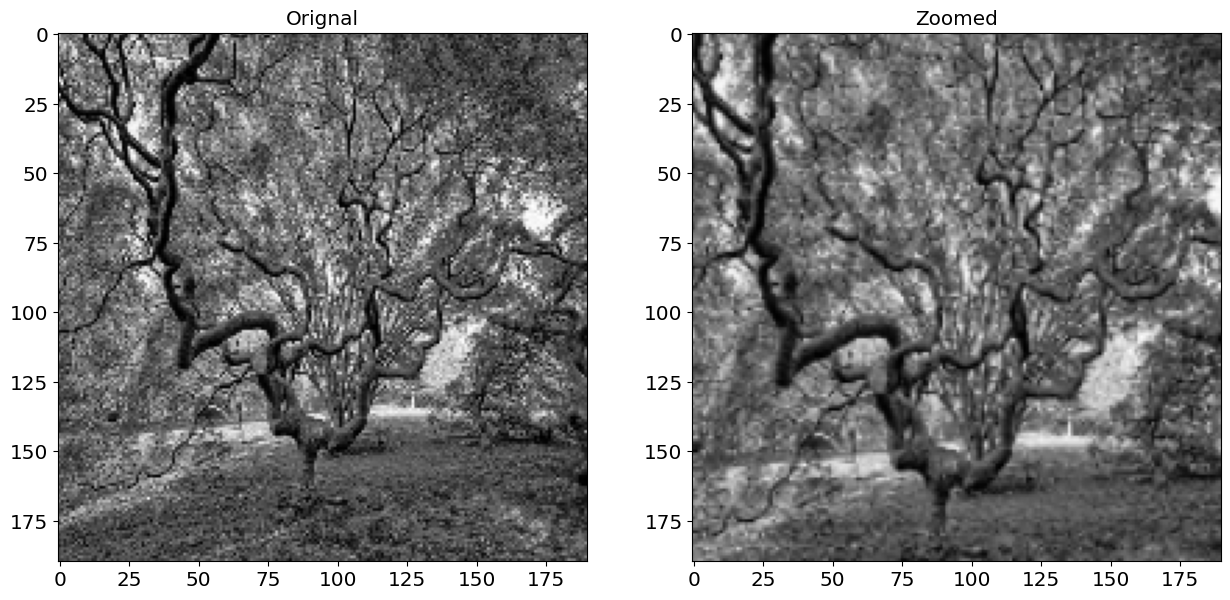

In [14]:
layer = tf.keras.layers.RandomZoom(height_factor=(-0.2, -0.2), 
                                   width_factor=(-0.2, -0.2))

plt.figure()

img_num = 3

for images, labels in test_ds.take(1): # get me one batch
    
    out_images = layer(images)
    
    plt.subplot(1, 2, 1)
    plt.title('Orignal')
    plt.imshow(images[img_num].numpy().astype('uint8'))
    
    plt.subplot(1, 2, 2)
    plt.title('Zoomed')
    plt.imshow(out_images[img_num].numpy().astype('uint8'))
        

2023-12-05 11:30:24.340159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [734]
	 [[{{node Placeholder/_0}}]]
2023-12-05 11:30:24.341348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [734]
	 [[{{node Placeholder/_4}}]]


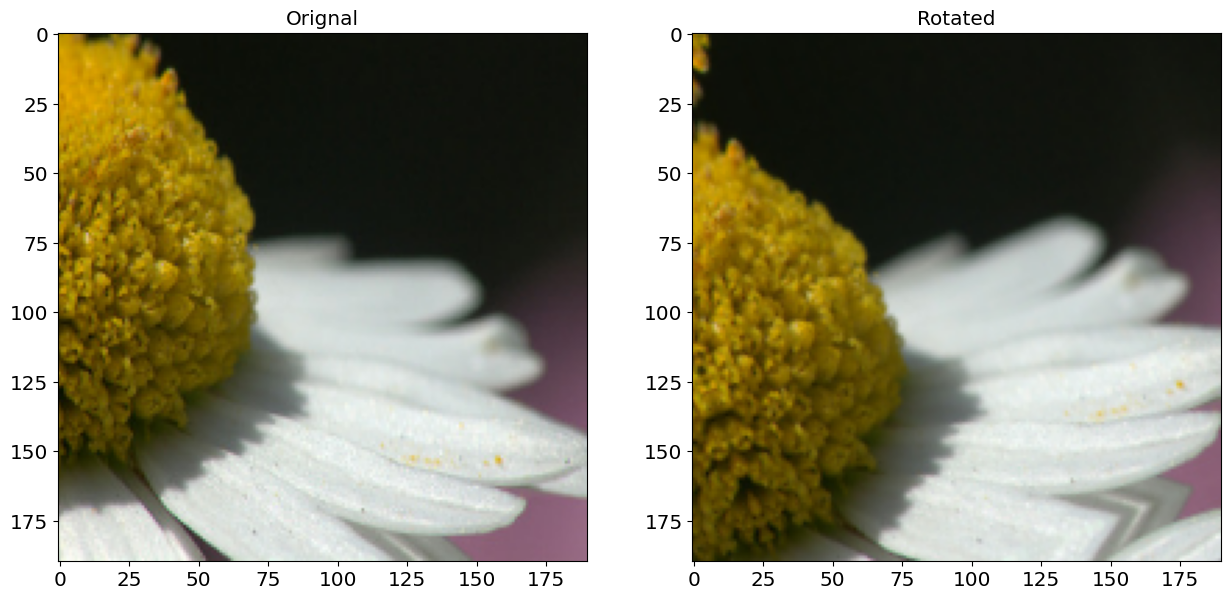

In [15]:
layer = tf.keras.layers.RandomRotation((-0.2, 0.3))

plt.figure()

img_num = 3

for images, labels in test_ds.take(1): # get me one batch
    
    out_images = layer(images)
    
    plt.subplot(1, 2, 1)
    plt.title('Orignal')
    plt.imshow(images[img_num].numpy().astype('uint8'))
    
    plt.subplot(1, 2, 2)
    plt.title('Rotated')
    plt.imshow(out_images[img_num].numpy().astype('uint8'))
        

In [16]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
# Build model
knl_reg = tf.keras.regularizers.L2(l2 = 0.001)
model = tf.keras.Sequential()
    
model.add(tf.keras.layers.Rescaling(1/255.)), # Convert between 0 and 1


###-------
### Set 1
###-------
# Conv layer
model.add(tf.keras.layers.Conv2D(8, (3,3), activation = 'relu',kernel_regularizer = knl_reg)), # 188 x 188 x 8

### Pooling
model.add(tf.keras.layers.MaxPool2D(2, 2)), # 94 x 94 x 8

###-------
### Set 2
###-------
# Conv layer
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu',kernel_regularizer = knl_reg)), # 92 x 92 x 16

### Pooling
model.add(tf.keras.layers.MaxPool2D(2, 2)), # 46 x 46 x 16

###-------
### Set 3
###-------
# Conv layer
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu',kernel_regularizer = knl_reg)), # 44 x 44 x 32

### Pooling
model.add(tf.keras.layers.MaxPool2D(2, 2)), # 22 x 22 x 32

###-------
### Set 4
###-------
# Conv layer
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu',kernel_regularizer = knl_reg)), # 20 x 20 x 64

### Pooling
model.add(tf.keras.layers.MaxPool2D(2, 2)), # 10 x 10 x 64

###-------
### Set 5
###-------
# Conv layer
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu',kernel_regularizer = knl_reg)), # 8 x 8 x 128

### Pooling
model.add(tf.keras.layers.MaxPool2D(2, 2)), # 4 x 4 x 128 

###-------
### Set 6
###-------

model.add(tf.keras.layers.Conv2D(256, (3,3), activation = 'relu',kernel_regularizer = knl_reg)), # 2 x 2 x 256

###------------
### Head Start
###------------
model.add(tf.keras.layers.Flatten()), # Flatten

model.add(tf.keras.layers.Dense(256, activation = 'relu',kernel_regularizer = knl_reg)), # Dense 1


model.add(tf.keras.layers.Dense(5)) #Output



In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=PATIENCE,
    mode = 'auto',
    baseline = None,
    verbose=1,
    restore_best_weights=True,
    start_from_epoch=0,
)
lr_decay = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=FACTOR_LR,
    patience=LR_PATIENCE,
    verbose=1,
    mode='auto',
    
)

#define model file path
modelFile = os.path.join(modelDir, subDir, altName)

#define checkpoint callback
model_callback = tf.keras.callbacks.ModelCheckpoint(
    modelFile,
    monitor = 'val_loss',
    verbose = 1,
    save_best_only = True,
    save_weights_only = True,
    mode = 'auto'
)

In [19]:
optim = tf.keras.optimizers.Adam(learning_rate = ALPHA)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy( from_logits = True)

model.compile(optimizer = optim, loss = loss_fn, metrics = ['accuracy'])

In [ ]:
model.summary()

In [20]:
history = model.fit(train_ds, validation_data=test_ds, 
                    epochs=EPOCHS, verbose = 1,
                    batch_size=BATCH_SIZE,
                    callbacks=[early_stopping, lr_decay, model_callback])

Epoch 1/50


2023-12-05 11:30:26.224164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2936]
	 [[{{node Placeholder/_0}}]]
2023-12-05 11:30:26.224908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2936]
	 [[{{node Placeholder/_0}}]]


92/92 [==============================] - ETA: 0s - loss: 1.3734 - accuracy: 0.3927

2023-12-05 11:31:00.324332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [734]
	 [[{{node Placeholder/_0}}]]
2023-12-05 11:31:00.325582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [734]
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_loss improved from inf to 1.13931, saving model to ../models/flower_photos/cnn_base
92/92 [==============================] - 37s 380ms/step - loss: 1.3734 - accuracy: 0.3927 - val_loss: 1.1393 - val_accuracy: 0.5368 - lr: 0.0010
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 1.0389 - accuracy: 0.5719
Epoch 2: val_loss did not improve from 1.13931
92/92 [==============================] - 30s 328ms/step - loss: 1.0389 - accuracy: 0.5719 - val_loss: 1.1681 - val_accuracy: 0.5327 - lr: 0.0010
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 0.9519 - accuracy: 0.5957
Epoch 3: val_loss improved from 1.13931 to 0.98939, saving model to ../models/flower_photos/cnn_base
92/92 [==============================] - 28s 305ms/step - loss: 0.9519 - accuracy: 0.5957 - val_loss: 0.9894 - val_accuracy: 0.6076 - lr: 0.0010
Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 0.8652 - accuracy: 0.6540
Epoch 4: val_loss improved from 0.989

In [ ]:
model.evaluate(test_ds, train_ds)

In [21]:
###-----------------------------------
### Function to plot Loss Curve
###-----------------------------------

def fn_plot_tf_hist(hist_df):
    '''
    Args:
      hist_df : pandas Dataframe with four columns
                For 'x' values, we will use index
    '''
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    
    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y3] == hist_df[y3].min()]
    
    ax = axes[0]

    hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "{}: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(y1.capitalize(),
                           hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot
    
    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y3].to_numpy()[0]), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid();
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)
    
    # little beautification
    txtFmt = "{}: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(y2.capitalize(),
                           hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy()-1, best[y4].to_numpy()[0]), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow
    
    
    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.grid()
    ax.legend(loc = 'lower left')
    
    plt.tight_layout()

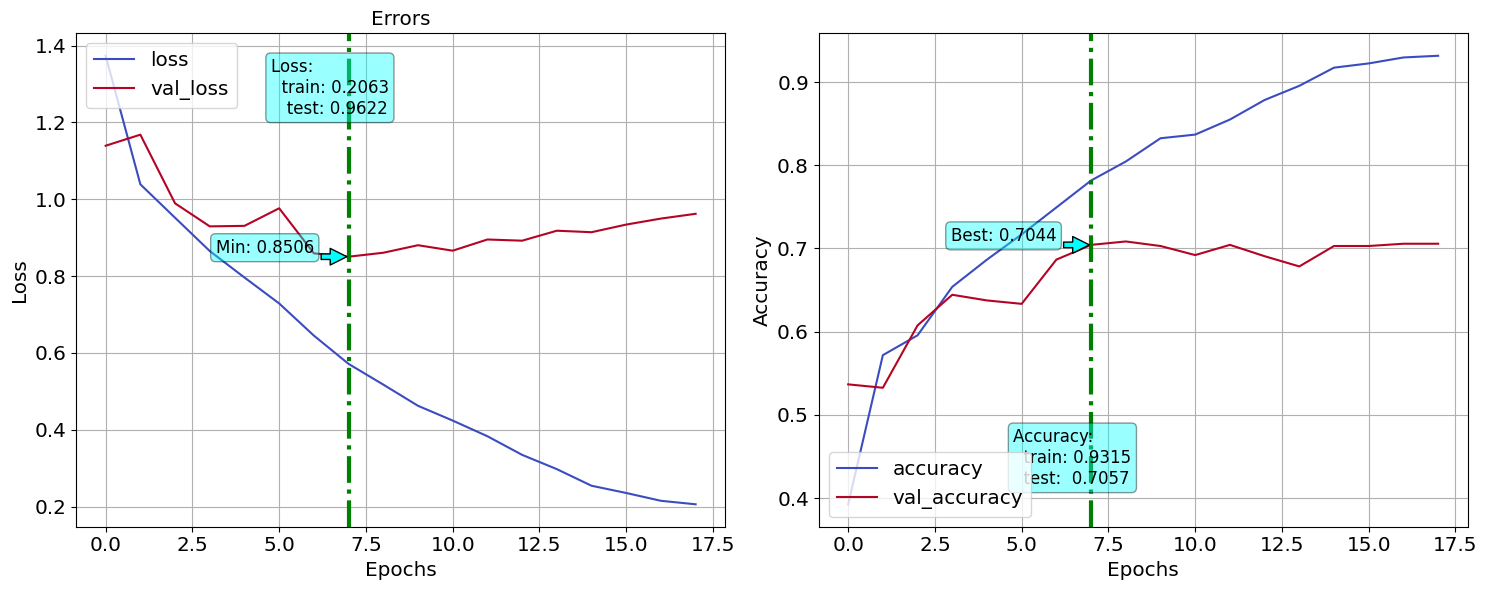

In [22]:
loss_df = pd.DataFrame(history.history)
fn_plot_tf_hist(loss_df)

In [23]:
loss_df[loss_df['val_loss'] == loss_df['val_loss'].min()]

,loss,accuracy,val_loss,val_accuracy,lr
7,0.571605,0.781676,0.850554,0.70436,0.0005
